In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import joblib

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
from IPython.display import display, HTML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import shap 
import lime# SHAP for explainability
from lime.lime_tabular import LimeTabularExplainer  # LIME for local explanations
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import time
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf





# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt) #ensures any changes made to matplotlib.pyplot during the session are applied.
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

c:\Users\tonya\Anaconda3\envs\fl_project_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df = pd.read_csv('dataset/edge_iiot.csv', low_memory=False)

In [3]:
df.shape

(1909671, 69)

In [4]:
df.shape

(1909671, 69)

In [5]:
print(df['Attack_type'].value_counts())

Attack_type
7     1363998
4      121567
2       67939
11      50826
3       50062
13      50026
8       49933
1       48544
12      36807
0       24026
9       19977
14      15066
10       9689
5         853
6         358
Name: count, dtype: int64


In [6]:
print(1363998-(121567 + 67939 +50826 + 50062 + 50026+49933+48544+36807+24026+19977+15066+9689+853+358))

818325


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Extract features and labels
X = df.drop(columns=['Attack_type','Attack_label']).values
y = df['Attack_type'].values
random.seed(40)
num_clients = 10
alpha = 0.5
classes = np.unique(y)
data_per_client = defaultdict(list)

# Dirichlet-based partitioning
for c in classes:
    idx = np.where(y == c)[0]
    np.random.shuffle(idx)
    proportions = np.random.dirichlet([alpha] * num_clients)
    proportions = (np.cumsum(proportions) * len(idx)).astype(int)[:-1]
    splits = np.split(idx, proportions)
    
    for client_id, data_idx in enumerate(splits):
        data_per_client[client_id].extend(data_idx)

# Build client datasets
client_datasets = {}
for client_id, indices in data_per_client.items():
    client_X = X[indices]
    client_y = y[indices]
    client_datasets[client_id] = (client_X, client_y)

    # Save to CSV
    client_df = pd.DataFrame(client_X, columns=df.drop(columns=['Attack_type','Attack_label']).columns)
    client_df['Attack_type'] = client_y
    client_df['Attack_label'] = df.loc[indices, 'Attack_label'].values
    client_df.to_csv(f'dataset/client_{client_id}_data.csv', index=False)
    print(f"Client {client_id} data saved with {len(client_y)} samples.")


Client 0 data saved with 326927 samples.
Client 1 data saved with 44202 samples.
Client 2 data saved with 235526 samples.
Client 3 data saved with 131671 samples.
Client 4 data saved with 91837 samples.
Client 5 data saved with 78319 samples.
Client 6 data saved with 221130 samples.
Client 7 data saved with 182575 samples.
Client 8 data saved with 121402 samples.
Client 9 data saved with 476082 samples.


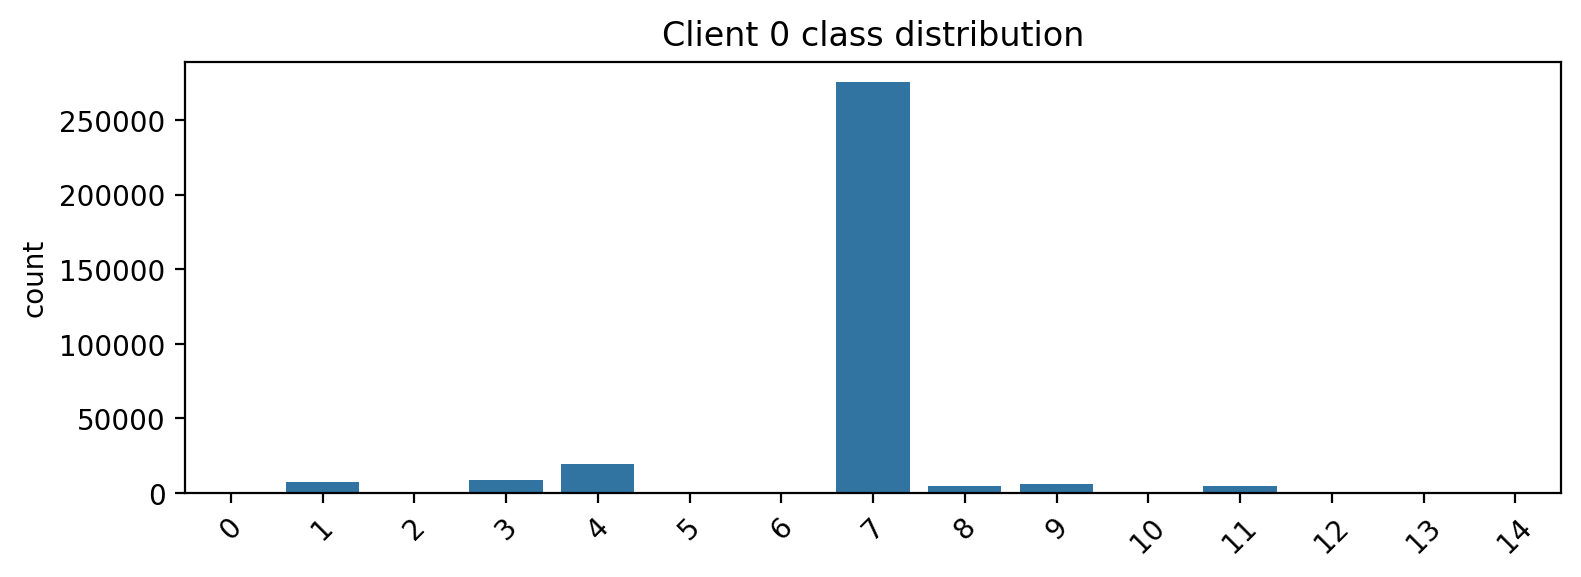

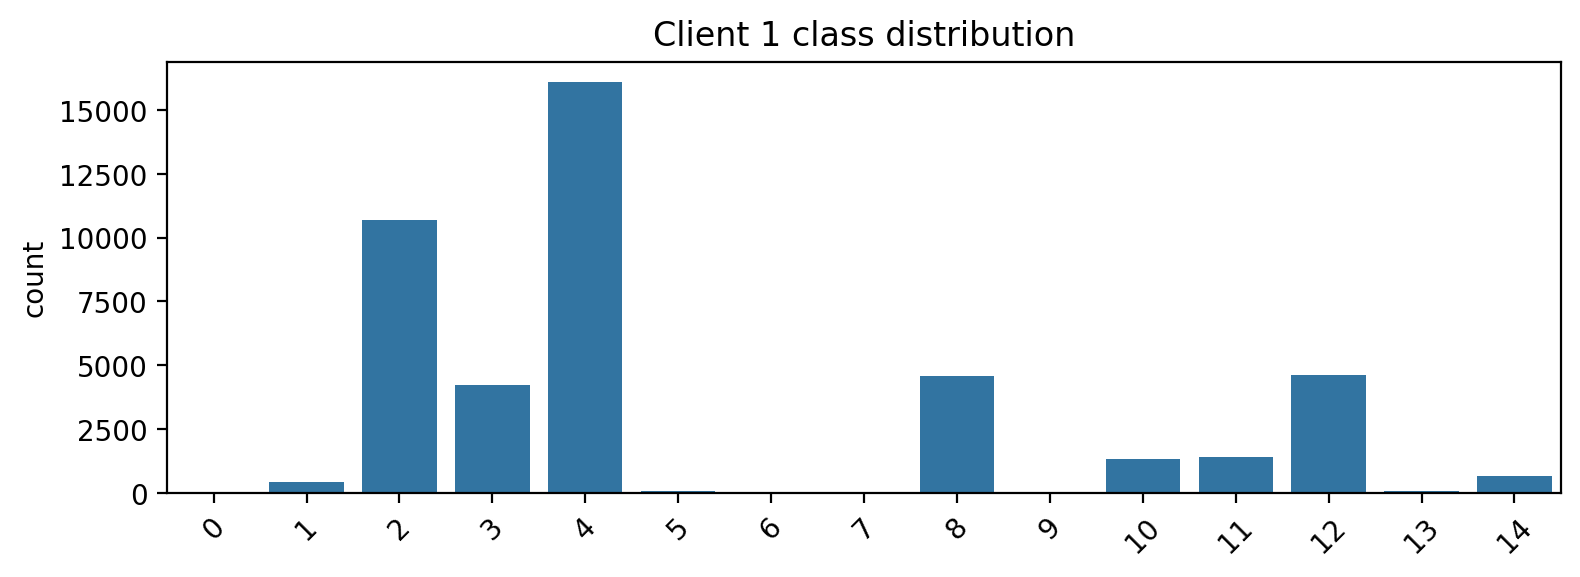

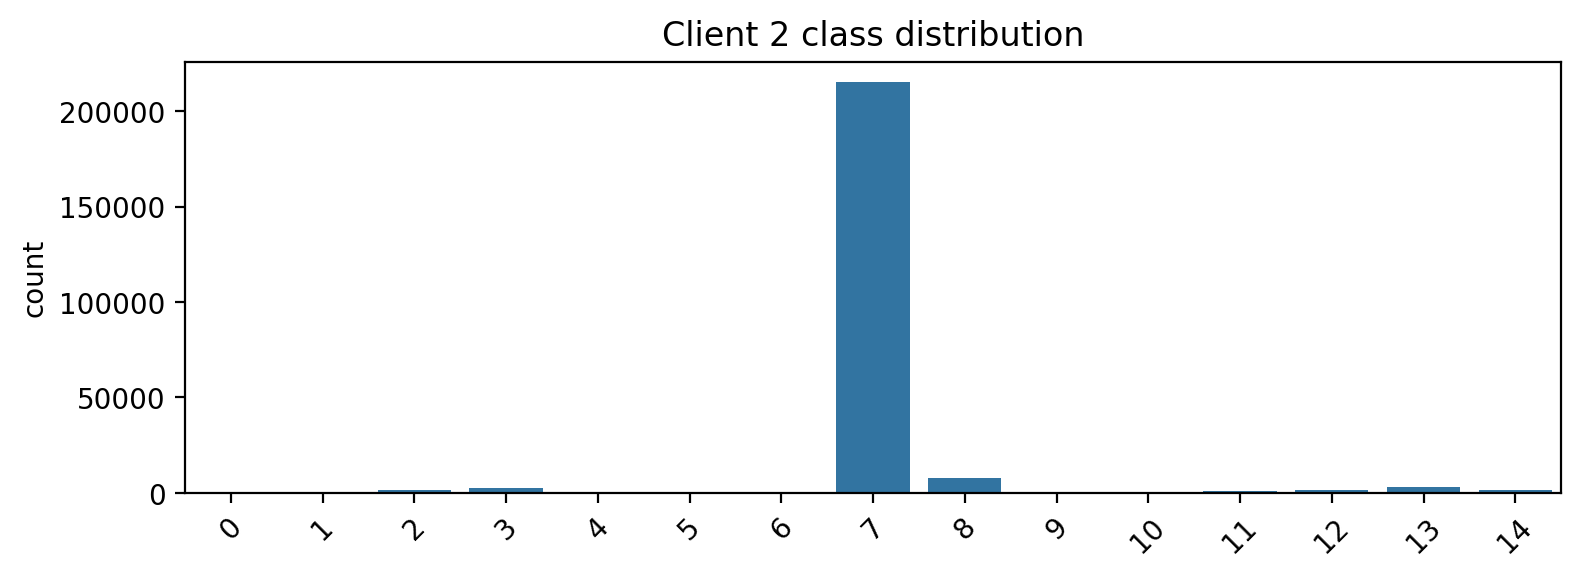

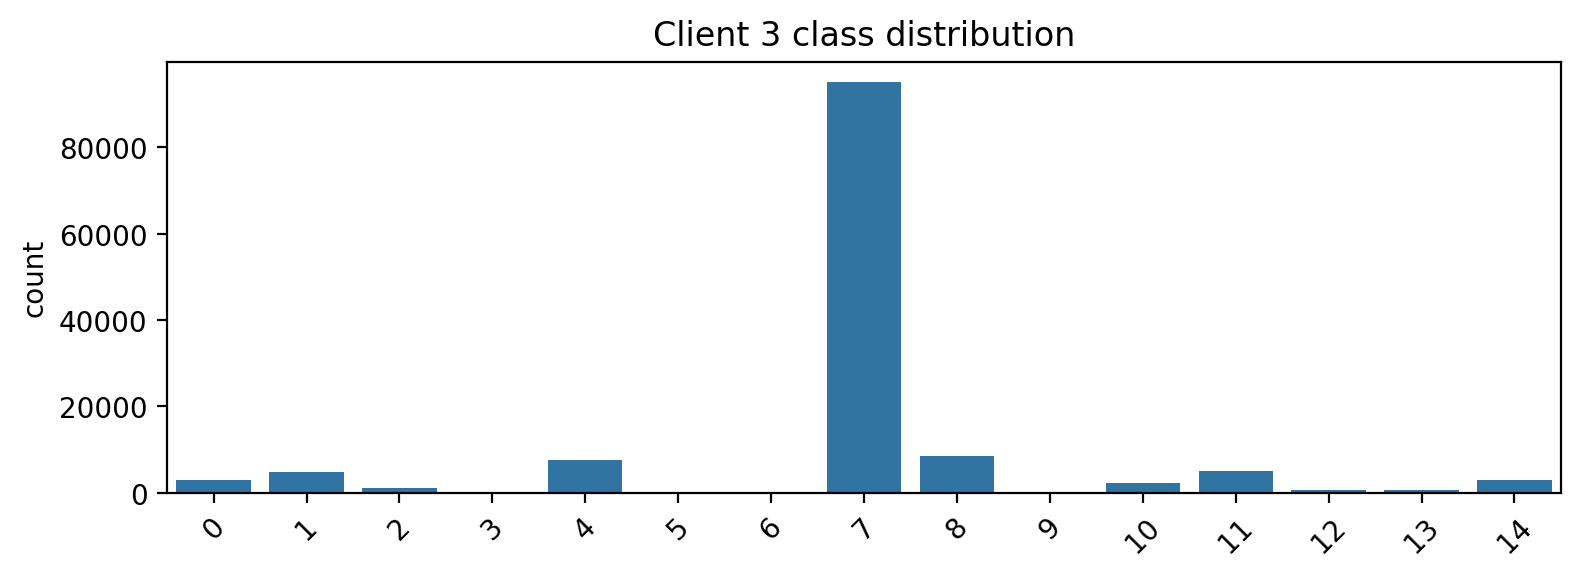

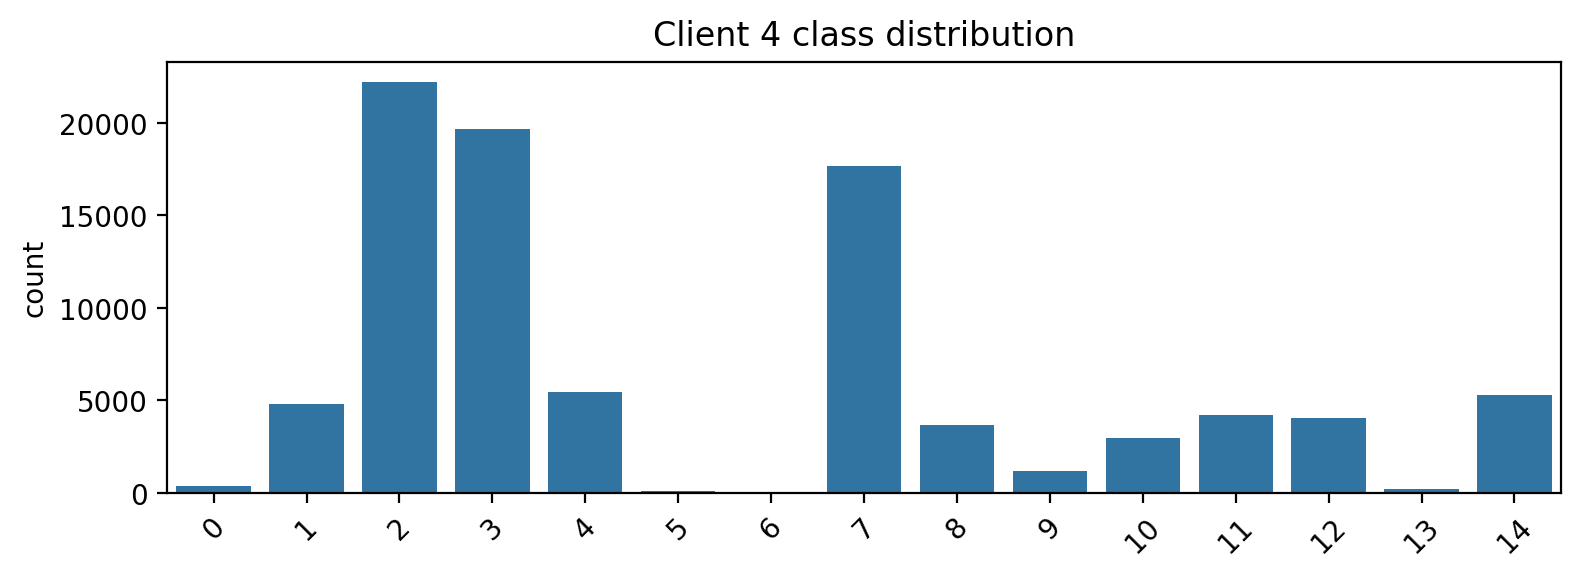

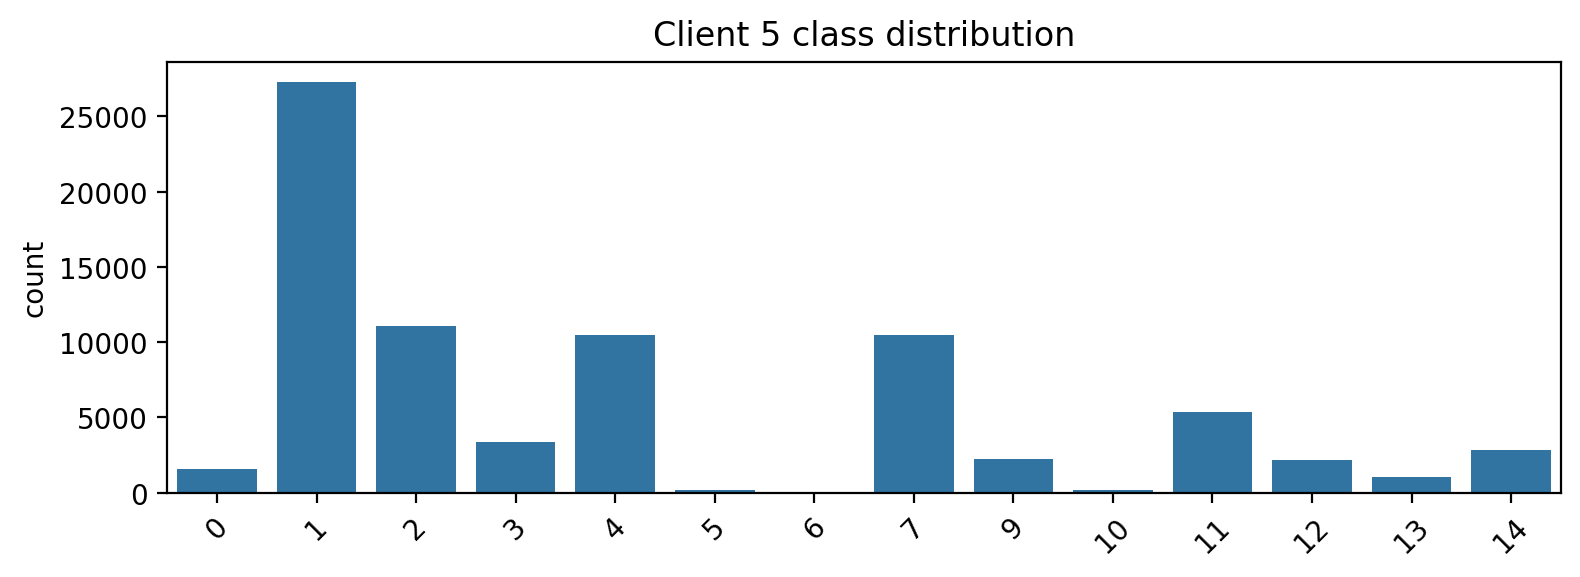

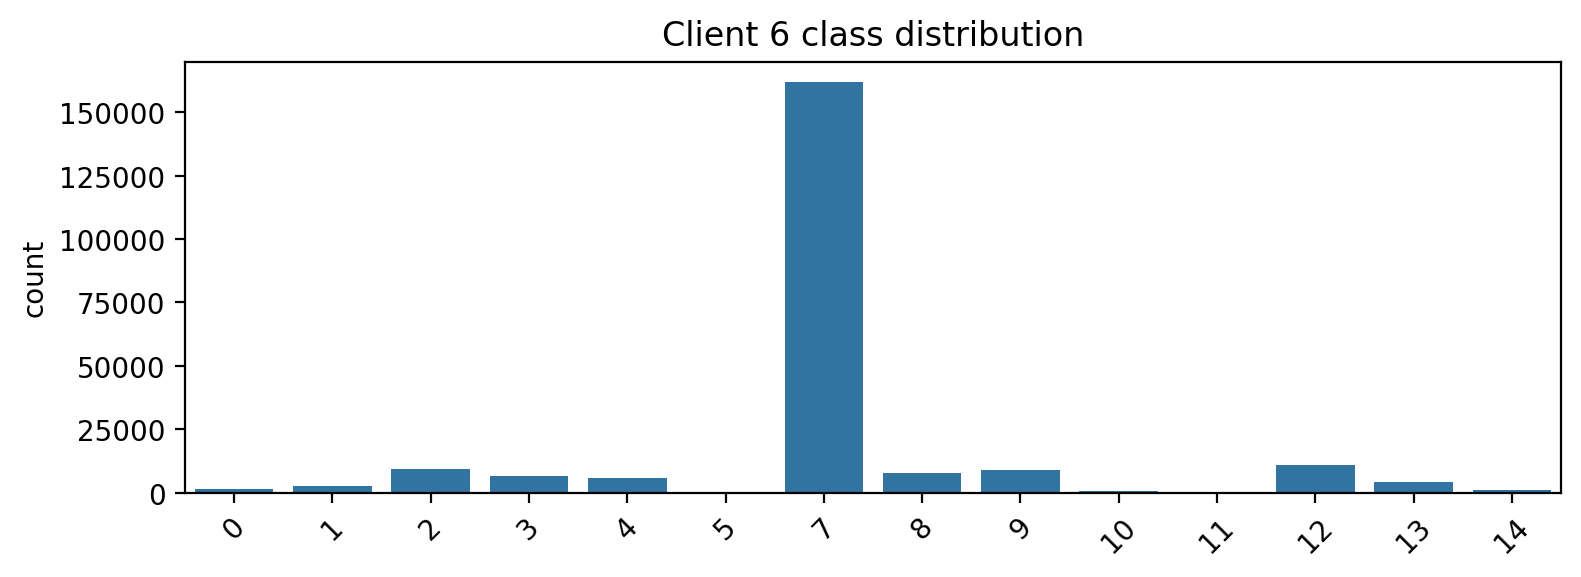

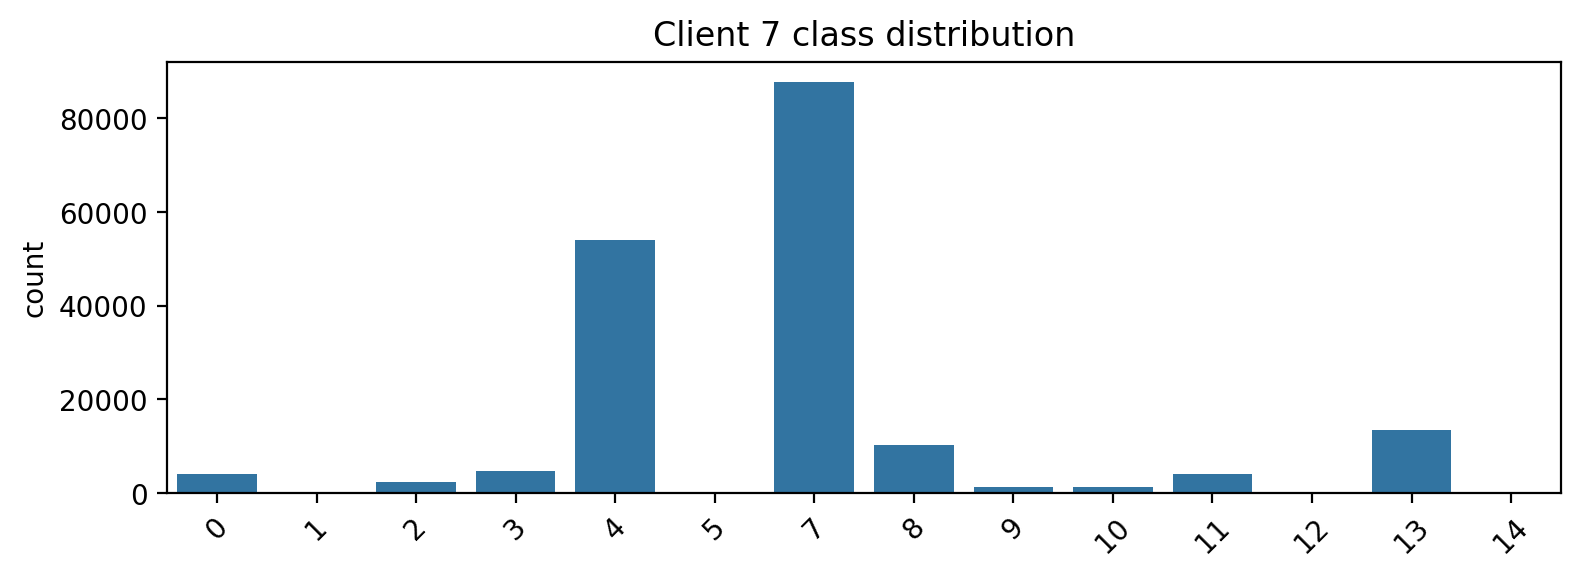

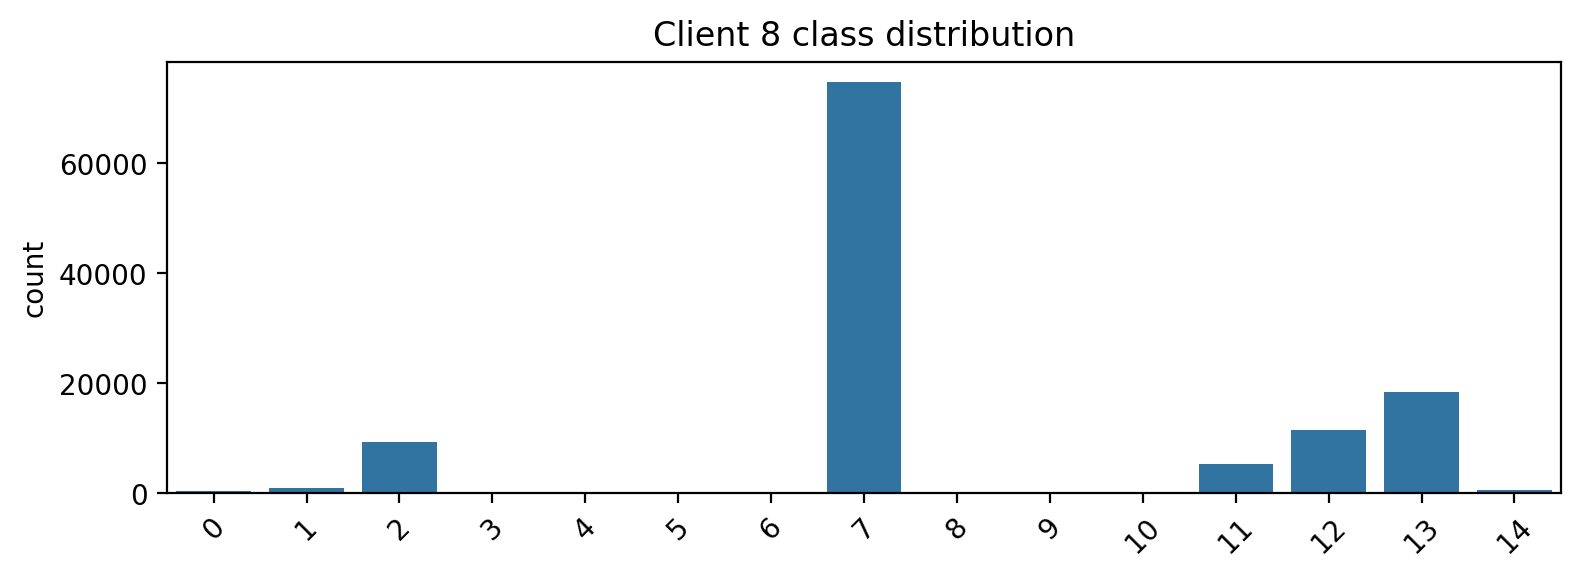

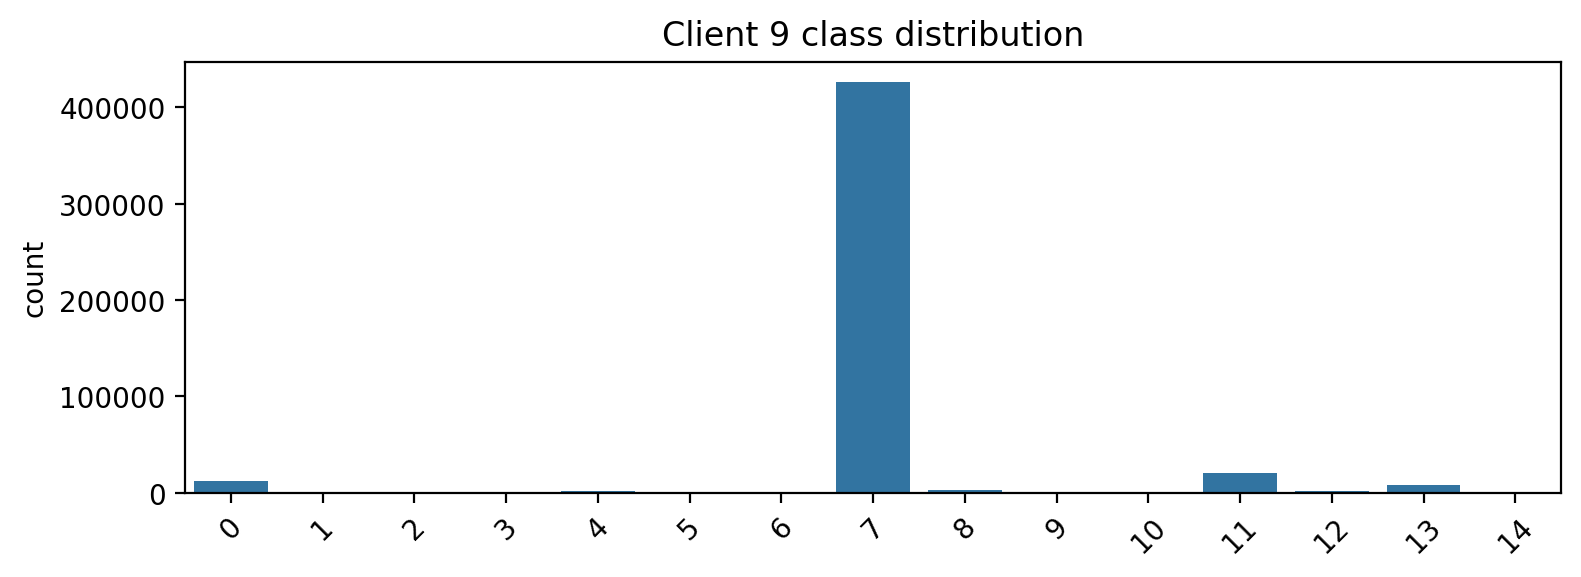

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for client_id, (_, client_y) in client_datasets.items():
    plt.figure(figsize=(8, 3))
    sns.countplot(x=client_y)
    plt.title(f'Client {client_id} class distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()